In [1]:
import numpy as np
from geometricus_deep_learning import utils, embedder
import matplotlib.pyplot as plt
import torch
from glob import glob
import pprint

%load_ext autoreload
%autoreload 2


In [2]:
pdb_folder = "./data/scope/"

In [3]:
invariant_types = [embedder.InvariantType(type=embedder.SplitType.KMER, 
                                          k=30, moment_types=None),
                   embedder.InvariantType(type=embedder.SplitType.RADIUS, 
                                          k=10, moment_types=None)]

In [4]:
files = {x.split("/")[-1] for x in glob(pdb_folder + "*")}
files

{'d3flka_.ent',
 'd2ffta1.ent',
 'd1f13a3.ent',
 'd3c02a_.ent',
 'd1z6ga_.ent',
 'd1gv2a2.ent',
 'd1irza_.ent',
 'd2z16a1.ent',
 'd2a26a1.ent',
 'd1kkoa1.ent',
 'd1lm8b_.ent',
 'd1vi0a2.ent',
 'd3swxa_.ent',
 'd2fgga1.ent',
 'd1wdva_.ent',
 'd5lhma1.ent',
 'd1cf7a_.ent',
 'd1a6ca2.ent',
 'd2ctja1.ent',
 'd4fw1a2.ent',
 'd1vk9a1.ent',
 'd1i1ip_.ent',
 'd1qhda2.ent',
 'd2avna1.ent',
 'd1jbqa_.ent',
 'd3b82a2.ent',
 'd1g1ca_.ent',
 'd2hjqa1.ent',
 'd2euia1.ent',
 'd5gpga1.ent',
 'd2iepa2.ent',
 'd1x3za_.ent',
 'd3qzba1.ent',
 'd1q8ba_.ent',
 'd4ubpc1.ent',
 'd4ohna_.ent',
 'd1ffya2.ent',
 'd1pj3a2.ent',
 'd1x2pa1.ent',
 'd5eb9a_.ent',
 'd2nx8a_.ent',
 'd2ffja1.ent',
 'd2opva_.ent',
 'd4itja_.ent',
 'd2fcja1.ent',
 'd1tf5a1.ent',
 'd1wuba_.ent',
 'd2gmya1.ent',
 'd2i5fa2.ent',
 'd1ciya3.ent',
 'd1vmga_.ent',
 'd3coka1.ent',
 'd5a0yc_.ent',
 'd2yyda1.ent',
 'd5ep2a1.ent',
 'd1wyua_.ent',
 'd4hlca_.ent',
 'd1r8ia_.ent',
 'd1ypzf1.ent',
 'd2wy8a_.ent',
 'd2gnca1.ent',
 'd2wq7a2.ent',
 'd1p2fa

In [5]:
domain_info = utils.ScopeInfo.from_scope_class_file("./data/dir.cla.scope.2.05-stable.txt").scope_classification
mappings = {f"{k}.ent": f"{v.cf}" for k, v in domain_info.items() if f"{k}.ent" in files}

In [6]:
keys, counts = np.unique(list(mappings.values()), return_counts=True)
least_allowed_class_count = 20
keys_to_use = {x for x in keys[np.where(counts >= least_allowed_class_count)[0]]}
mappings = {k: v for k, v in mappings.items() if v in keys_to_use}
print("cath info linked to files")
len(keys_to_use), len(mappings)

cath info linked to files


(126, 7631)

In [15]:
# !mkdir ./models/scope_model

In [7]:
# ys = np.unique(list(mappings.values()))
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(handle_unknown="ignore")
# encoder.fit([[x] for x in set(ys)])


In [9]:
# Create and train the model.. takes some time to start due to the preprocessing step

emb = embedder.GeometricusGraphEmbedder.fit("./data/scope/", invariant_types, mappings,
                                            epochs=3_000, file_output_path="./models/scope_model/",
                                            learning_rate=0.0002, number_of_batches=512,
                                            hidden_channels=128)

Initial: Train Acc: 0.0049, Test Acc: 0.0033
Epoch: 010, Train Acc: 0.1152, Test Acc: 0.1069
Epoch: 020, Train Acc: 0.1715, Test Acc: 0.1583
Epoch: 030, Train Acc: 0.2073, Test Acc: 0.1877
Epoch: 040, Train Acc: 0.2359, Test Acc: 0.2153
Epoch: 050, Train Acc: 0.2570, Test Acc: 0.2363
Epoch: 060, Train Acc: 0.2743, Test Acc: 0.2510
Epoch: 070, Train Acc: 0.2923, Test Acc: 0.2653
Epoch: 080, Train Acc: 0.3077, Test Acc: 0.2815
Epoch: 090, Train Acc: 0.3295, Test Acc: 0.3062
Epoch: 100, Train Acc: 0.3433, Test Acc: 0.3164
Epoch: 110, Train Acc: 0.3558, Test Acc: 0.3269
Epoch: 120, Train Acc: 0.3652, Test Acc: 0.3333
Epoch: 130, Train Acc: 0.3726, Test Acc: 0.3369
Epoch: 140, Train Acc: 0.3820, Test Acc: 0.3456
Epoch: 150, Train Acc: 0.3879, Test Acc: 0.3536
Epoch: 160, Train Acc: 0.3947, Test Acc: 0.3553
Epoch: 170, Train Acc: 0.3993, Test Acc: 0.3593
Epoch: 180, Train Acc: 0.4043, Test Acc: 0.3647
Epoch: 190, Train Acc: 0.4089, Test Acc: 0.3694
Epoch: 200, Train Acc: 0.4135, Test Acc: 0.

Epoch: 1700, Train Acc: 0.7233, Test Acc: 0.6156
Epoch: 1710, Train Acc: 0.7231, Test Acc: 0.6135
Epoch: 1720, Train Acc: 0.7257, Test Acc: 0.6174
Epoch: 1730, Train Acc: 0.7267, Test Acc: 0.6165
Epoch: 1740, Train Acc: 0.7255, Test Acc: 0.6167
Epoch: 1750, Train Acc: 0.7278, Test Acc: 0.6190
Epoch: 1760, Train Acc: 0.7288, Test Acc: 0.6200
Epoch: 1770, Train Acc: 0.7298, Test Acc: 0.6187
Epoch: 1780, Train Acc: 0.7299, Test Acc: 0.6191
Epoch: 1790, Train Acc: 0.7280, Test Acc: 0.6181
Epoch: 1800, Train Acc: 0.7314, Test Acc: 0.6189
Epoch: 1810, Train Acc: 0.7317, Test Acc: 0.6204
Epoch: 1820, Train Acc: 0.7326, Test Acc: 0.6185
Epoch: 1830, Train Acc: 0.7362, Test Acc: 0.6226
Epoch: 1840, Train Acc: 0.7336, Test Acc: 0.6211
Epoch: 1850, Train Acc: 0.7340, Test Acc: 0.6220
Epoch: 1860, Train Acc: 0.7364, Test Acc: 0.6210
Epoch: 1870, Train Acc: 0.7378, Test Acc: 0.6232
Epoch: 1880, Train Acc: 0.7385, Test Acc: 0.6236
Epoch: 1890, Train Acc: 0.7384, Test Acc: 0.6229
Epoch: 1900, Train A

TypeError: __init__() got an unexpected keyword argument 'classes_to_ids'

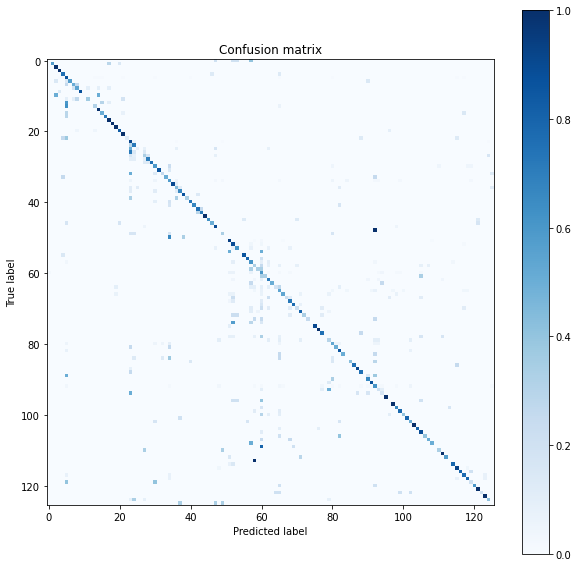

In [156]:
from sklearn.metrics import confusion_matrix
import itertools

confusionMatrix = confusion_matrix(labels, pred)

confusionMatrix = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(confusionMatrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
